<a href="https://colab.research.google.com/github/ngotancuong/mse.dip/blob/main/Quiz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Convert the objects’ color as follows: the square to red, the rectangle to
green, the pentagon to blue, the circle to magenta and the star to cyan.

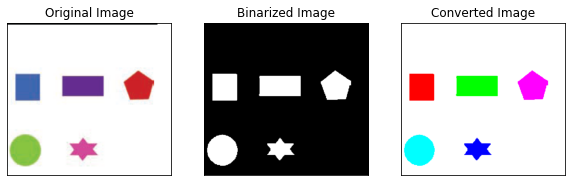

In [14]:
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image from url
url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/shapes.png'
with urllib.request.urlopen(url) as url_response:
    img_array = np.asarray(bytearray(url_response.read()), dtype=np.uint8)
    Img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# Convert to grayscale
GrayImg = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
GrayImg[0:20,:] = 255

# Binarize image
level = cv2.threshold(GrayImg, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1] / 255

# Convert colors
num_labels, L, stats, centroids = cv2.connectedComponentsWithStats(level.astype(np.uint8))

# Create colormap with red, magenta, green, blue, and cyan colors
cmap = np.zeros((num_labels, 3))
cmap[1] = [1, 0, 1] # magenta
cmap[2] = [1, 0, 0] # red
cmap[3] = [0, 1, 0] # green
cmap[4] = [0, 1, 1] # cyan
cmap[5] = [0, 0, 1] # blue
rgblabel = cmap[L]

# Replace black background with white background
black_pixels = np.all(rgblabel == [0, 0, 0], axis=-1) # Check if all elements are equal to zero
rgblabel[black_pixels] = [1, 1, 1] # Replace with white pixels

minpolysize = 2000 #minimum area to consider as an object
regs = []
for i in range(1, num_labels):
    if stats[i, cv2.CC_STAT_AREA] >= minpolysize:
        regs.append(stats[i])
        
# Display images
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.patch.set_facecolor('white')  # Set background color
axs[0].imshow(cv2.cvtColor(Img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(level, cmap='gray')
axs[1].set_title('Binarized Image')
axs[2].imshow(rgblabel)
axs[2].set_title('Converted Image')
plt.show()



2. 

(a) Convert the original image to binary and display the result.

(b) Use erosion and/or dilation to draw the edge of the objects. You can
choose any structuring element to apply.

(c) Generate a structuring element as below. Could we count the number
of coins using this structuring element?

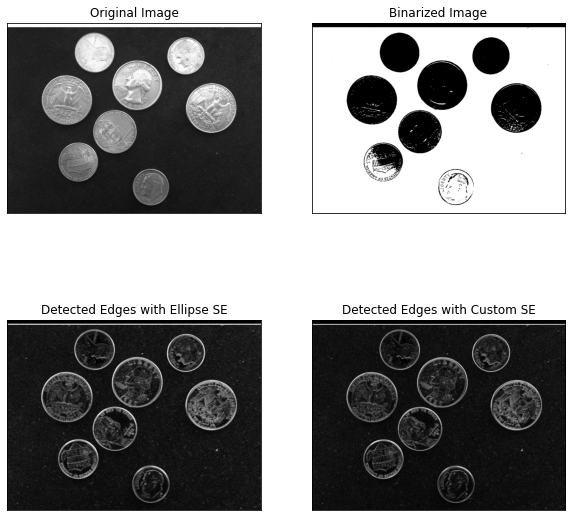

In [24]:
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image from url
url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/coins%20(2).png'
with urllib.request.urlopen(url) as url_response:
    img_array = np.asarray(bytearray(url_response.read()), dtype=np.uint8)
    Img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# Convert to grayscale
GrayImg = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
GrayImg[0:20,:] = 255

#Câu a)
# Binarize image  
level = cv2.threshold(GrayImg, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1] / 255

# Convert colors
num_labels, L, stats, centroids = cv2.connectedComponentsWithStats(level.astype(np.uint8))

# Choose structuring element
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Câu b)
# Apply morphological operations
Img_dilated = cv2.dilate(GrayImg, se)
Img_eroded = cv2.erode(GrayImg, se)
edge1 = Img_dilated - GrayImg
edge2 = GrayImg - Img_eroded
edge3 = edge1 + edge2

# Câu c)
# Create custom structuring element
se1 = np.array([[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0]], dtype=np.uint8)
Img_dilated_custom = cv2.dilate(GrayImg, se1)
Img_eroded_custom = cv2.erode(GrayImg, se1)
edge1_custom = Img_dilated_custom - GrayImg
edge2_custom = GrayImg - Img_eroded_custom
edge3_custom = edge1_custom + edge2_custom

# Display images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.patch.set_facecolor('white')  # Set background color
axs[0, 0].imshow(cv2.cvtColor(GrayImg, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
# Câu a)
axs[0, 1].imshow(level, cmap='gray')
axs[0, 1].set_title('Binarized Image')
# Câu b)
axs[1, 0].imshow(edge3, cmap='gray')
axs[1, 0].set_title('Detected Edges with Ellipse SE')
# Câu c)
axs[1, 1].imshow(edge3_custom, cmap='gray')
axs[1, 1].set_title('Detected Edges with Custom SE')
plt.show()
